In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from fair import FAIR
from fair.interface import fill, initialise
from fair.io import read_properties
from fair.interface import initialise

from itertools import product

In [2]:
def genFairModel(y0=1850,
                 y1=2100,
                 emissions_file='FAiR_data/emissions_abrupt.csv',
                 concentration_file='FAiR_data/concentration_constant.csv',
                 forcing_file='FAiR_data/natural_forcing.csv',
                 climateConfig='FAiR_data/configs_central_no_stochastic.csv',
                 speciesConfig='FAiR_data/species_configs_properties.csv',
                 scenarios=["abrupt"],
                 configs=["central"]
                 ):

    # create a fair object
    f = FAIR()

    # define the time range
    # this needs to be in the range specificed by the
    # emissions/concentration/forcing files 
    f.define_time(y0,y1,1)
    f.define_scenarios(scenarios)

    # define the climate configuration - this needs to make whats in the configuration file later
    f.define_configs(configs)

    # get the species properties - probably never need to modify this line.
    species, properties = read_properties(speciesConfig)
    f.define_species(species, properties)

    # set up the fair object and put the data in 
    f.allocate()

    f.fill_from_csv(
        emissions_file=emissions_file,
        concentration_file=concentration_file,
        forcing_file=forcing_file
    )
    f.fill_species_configs(speciesConfig)

    # this is where we load the climate configuration
    f.override_defaults(climateConfig)

    # set the intial values of everything 
    #initialise(f.concentration, 278.3, specie='CO2')
    initialise(f.concentration, f.species_configs['baseline_concentration'])
    initialise(f.forcing, 0)
    initialise(f.temperature, 0)
    initialise(f.cumulative_emissions, 0)
    initialise(f.airborne_emissions, 0)
    initialise(f.ocean_heat_content_change, 0)

    return f


Running 1 projections in parallel:   0%|          | 0/250 [00:00<?, ?timesteps/s]

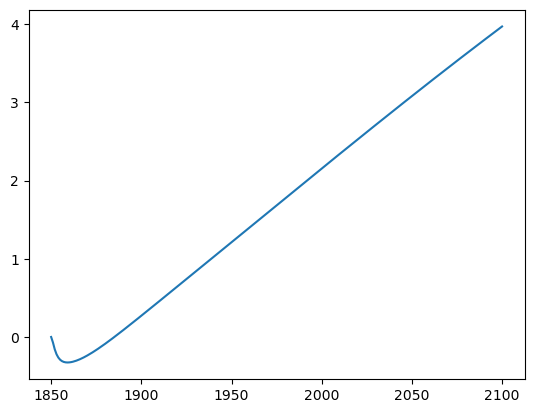

In [3]:
f=genFairModel()
f.run()

y=np.arange(1850,2101,1)
plt.plot(y,f.temperature.isel(config=0,layer=0))


Running 4 projections in parallel:   0%|          | 0/250 [00:00<?, ?timesteps/s]

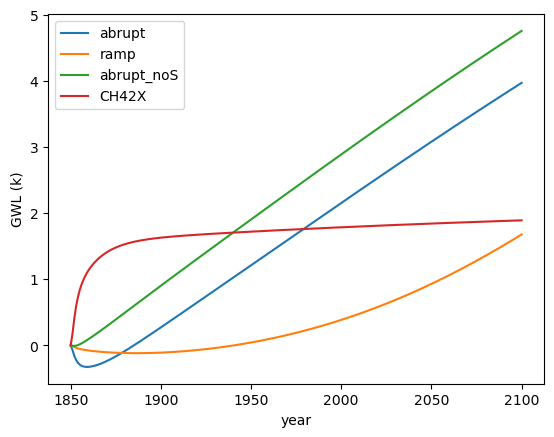

In [4]:
scenarios=['abrupt','ramp','abrupt_noS','CH42X']
f=genFairModel(
                 emissions_file='FAiR_data/emissions_testSuite.csv',
                 concentration_file='FAiR_data/concentration_constant_testSuite.csv',
                 forcing_file='FAiR_data/natural_forcing_testSuite.csv',
                 scenarios=scenarios
)
f.run()
plt.plot(y,f.temperature.isel(config=0,layer=0),label=scenarios)

plt.xlabel('year')
plt.ylabel('GWL (k)')

plt.legend()

Running 16 projections in parallel:   0%|          | 0/250 [00:00<?, ?timesteps/s]

Text(0.5, 0.98, 'No Sulfur Experiment')

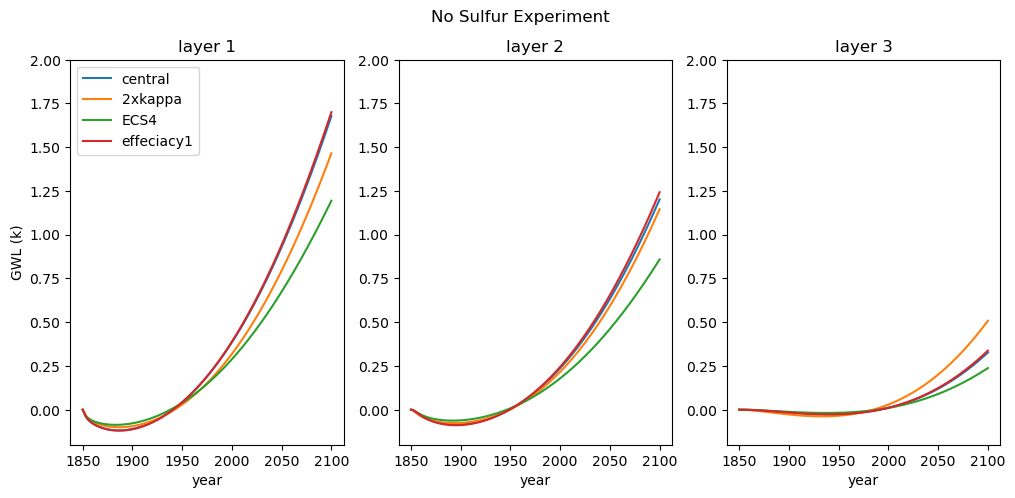

In [5]:
#ye=np.arange(1850,2501,1)
configs=['central','2xkappa','ECS4','effeciacy1']
f=genFairModel(  y1=2100,
                 emissions_file='FAiR_data/emissions_testSuite.csv',
                 concentration_file='FAiR_data/concentration_constant_testSuite.csv',
                 forcing_file='FAiR_data/natural_forcing_testSuite.csv',
                 scenarios=scenarios,
                configs=configs,
                climateConfig='FAiR_data/configs_sensitivity_no_stochastic.csv'
)

f.run()

fig,axs=plt.subplots(1,3,figsize=(12,5))

for i in range(0,3):
    axs[i].plot(y,f.temperature.data[:,1,:,i],label=configs)
    axs[i].set_title(f'layer {i+1}')
    axs[i].set_xlabel('year')
    axs[i].set_ylim([-0.2,2])
axs[0].legend()
axs[0].set_ylabel('GWL (k)')
fig.suptitle('No Sulfur Experiment')


In [73]:
f = FAIR()
f.define_time(1750, 2100, 1)
# Define SSP scenarios
#scenarios = ['ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp434', 'ssp460', 'ssp534-over', 'ssp585']
scenarios = [ 'ssp126', 'ssp245', 'ssp370', 'ssp460', 'ssp585']
f.define_scenarios(scenarios)
species, properties = read_properties('FAiR_data/species_configs_properties.csv')
f.define_species(species, properties)

f.define_configs(['high','central','low'])

f.allocate()

f.fill_species_configs('FAiR_data/species_configs_properties.csv')

f.fill_from_rcmip()

f.override_defaults('FAiR_data/configs_sensitivity_high_central_low.csv')

initialise(f.concentration, f.species_configs['baseline_concentration'])
initialise(f.forcing, 0)
initialise(f.temperature, 0)
initialise(f.cumulative_emissions, 0)
initialise(f.airborne_emissions, 0)

f.run()

Running 15 projections in parallel:   0%|          | 0/350 [00:00<?, ?timesteps/s]

In [84]:
f.emissions

<xarray.DataArray (timepoints: 350, scenario: 5, config: 3, specie: 9)>
array([[[[ 9.50561989e-03,  2.97464607e-01,  3.06970226e-01, ...,
                      nan,             nan,             nan],
         [ 9.50561989e-03,  2.97464607e-01,  3.06970226e-01, ...,
                      nan,             nan,             nan],
         [ 9.50561989e-03,  2.97464607e-01,  3.06970226e-01, ...,
                      nan,             nan,             nan]],

        [[ 9.50561989e-03,  2.97464607e-01,  3.06970226e-01, ...,
                      nan,             nan,             nan],
         [ 9.50561989e-03,  2.97464607e-01,  3.06970226e-01, ...,
                      nan,             nan,             nan],
         [ 9.50561989e-03,  2.97464607e-01,  3.06970226e-01, ...,
                      nan,             nan,             nan]],

        [[ 9.50561989e-03,  2.97464607e-01,  3.06970226e-01, ...,
                      nan,             nan,             nan],
         [ 9.50561989e-03,  2.97464607e-01,  3.06970226e-01, ...,
                      nan,             nan,             nan],
         [ 9.50561989e-03,  2.97464607e-01,  3.06970226e-01, ...,
                      nan,             nan,             nan]],
...
        [[ 7.95861521e+01,  2.64700263e+00,  8.22331548e+01, ...,
                      nan,             nan,             nan],
         [ 7.95861521e+01,  2.64700263e+00,  8.22331548e+01, ...,
                      nan,             nan,             nan],
         [ 7.95861521e+01,  2.64700263e+00,  8.22331548e+01, ...,
                      nan,             nan,             nan]],

        [[ 2.45797522e+01, -1.88412841e+00,  2.26956237e+01, ...,
                      nan,             nan,             nan],
         [ 2.45797522e+01, -1.88412841e+00,  2.26956237e+01, ...,
                      nan,             nan,             nan],
         [ 2.45797522e+01, -1.88412841e+00,  2.26956237e+01, ...,
                      nan,             nan,             nan]],

        [[ 1.28143025e+02, -1.42682239e+00,  1.26716203e+02, ...,
                      nan,             nan,             nan],
         [ 1.28143025e+02, -1.42682239e+00,  1.26716203e+02, ...,
                      nan,             nan,             nan],
         [ 1.28143025e+02, -1.42682239e+00,  1.26716203e+02, ...,
                      nan,             nan,             nan]]]])
Coordinates:
  * timepoints  (timepoints) float64 1.75e+03 1.752e+03 ... 2.098e+03 2.1e+03
  * scenario    (scenario) <U6 'ssp126' 'ssp245' 'ssp370' 'ssp460' 'ssp585'
  * config      (config) <U7 'high' 'central' 'low'
  * specie      (specie) <U30 'CO2 FFI' ... 'Aerosol-cloud interactions'

(1900.0, 2100.0)

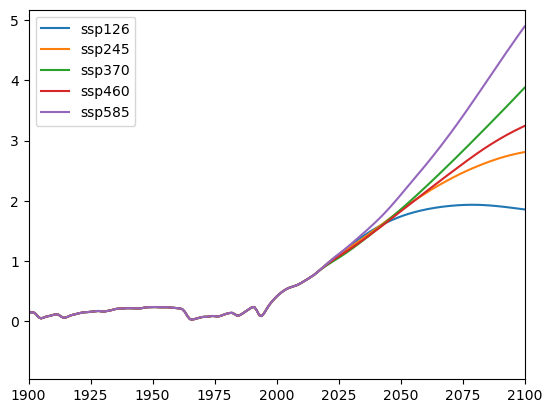

In [74]:
plt.plot(np.arange(1750,2101,1),f.temperature.data[:,:,1,0],label=scenarios)
plt.legend()
plt.xlim([1900,2100])

In [78]:
# find the distribution of temperatures 
f.temperature.sel(timebounds=2100,layer=0)

<xarray.DataArray (scenario: 5, config: 3)>
array([[2.33954848, 1.857225  , 1.59080431],
       [3.49123976, 2.80972289, 2.42614497],
       [4.74688729, 3.87806727, 3.37952013],
       [4.00124473, 3.24284405, 2.81201005],
       [5.96579027, 4.89366376, 4.27402941]])
Coordinates:
    timebounds  float64 2.1e+03
  * scenario    (scenario) <U6 'ssp126' 'ssp245' 'ssp370' 'ssp460' 'ssp585'
  * config      (config) <U7 'high' 'central' 'low'
    layer       int64 0

In [92]:
ycrossing_15 = np.zeros([len(scenarios),3])
for i,j in product(range(0,len(scenarios)),range(0,3)):
    try:
        ycrossing_15[i,j]=\
            f.timebounds.data[np.min(np.where(f.temperature.data[:,i,j,0]-1.5>=0))]
    except:
        ycrossing_15[i,j]=np.nan

print(ycrossing_15)

[[2031. 2039. 2049.]
 [2031. 2039. 2046.]
 [2033. 2040. 2046.]
 [2032. 2040. 2047.]
 [2030. 2037. 2042.]]


In [79]:
ycrossing_2 = np.zeros([len(scenarios),3])
for i,j in product(range(0,len(scenarios)),range(0,3)):
    try:
        ycrossing_2[i,j]=\
            f.timebounds.data[np.min(np.where(f.temperature.data[:,i,j,0]-2>=0))]
    except:
        ycrossing_2[i,j]=np.nan

print(ycrossing_2)

[[2046.   nan   nan]
 [2045. 2056. 2067.]
 [2045. 2054. 2062.]
 [2046. 2056. 2065.]
 [2041. 2049. 2054.]]


In [94]:
ycrossing_3 = np.zeros([len(scenarios),3])
for i,j in product(range(0,len(scenarios)),range(0,3)):
    try:
        ycrossing_3[i,j]=\
            f.timebounds.data[np.min(np.where(f.temperature.data[:,i,j,0]-3>=0))]
    except:
        ycrossing_3[i,j]=np.nan

print(ycrossing_3)

[[  nan   nan   nan]
 [2075.   nan   nan]
 [2067. 2080. 2090.]
 [2071. 2089.   nan]
 [2059. 2068. 2076.]]
